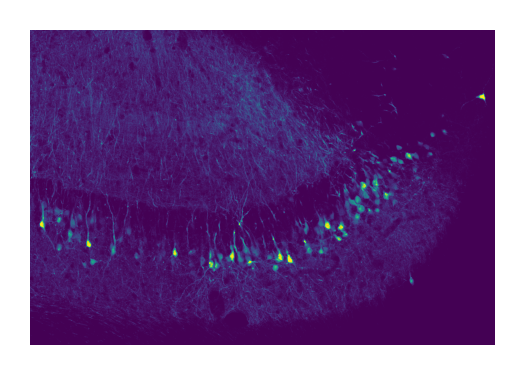

In [83]:
import numpy as np
import time, os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl

# connect to a GUI loop
%matplotlib inline

mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io

files = ["Substack1.jpg","Substack5.jpg","Substack10.jpg"]

#Show one image 
img = io.imread(files[-1])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()


In [65]:
#Setting up the variable for storing number of masks (cells)
outlines_list = []

#If want to use GPU, type "gpu=use_GPU" after setting up "use_GPU = core.use_gpu()" 
from cellpose import models, io
model = models.Cellpose(gpu=False, model_type='cyto')
# 0 - for greyscale images
channels = [[0,0],[0,0],[0,0]]  

#Loop for processing plain images
for chan, filename in zip(channels, files):
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=33.4, channels=chan)
#Saving results  
    io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)
    io.save_to_png(img, masks, flows, filename)
#Storing number of masks (cells)     
    outlines = utils.outlines_list(masks)

    outlines_list.append(len(outlines))

2022-01-17 16:03:08,054 [INFO] >>>> using CPU
2022-01-17 16:03:08,205 [INFO] ~~~ FINDING MASKS ~~~
2022-01-17 16:07:08,026 [INFO] >>>> TOTAL TIME 239.82 sec
2022-01-17 16:07:11,235 [INFO] ~~~ FINDING MASKS ~~~
2022-01-17 16:11:13,050 [INFO] >>>> TOTAL TIME 241.81 sec
2022-01-17 16:11:17,673 [INFO] ~~~ FINDING MASKS ~~~
2022-01-17 16:15:21,074 [INFO] >>>> TOTAL TIME 243.40 sec


In [66]:
#Export results (number of masks) into csv file 
import pandas as pd

outlines_list = pd.DataFrame({'Filename': files, 'Num Cells': outlines_list})
outlines_list.to_csv('hi.csv')


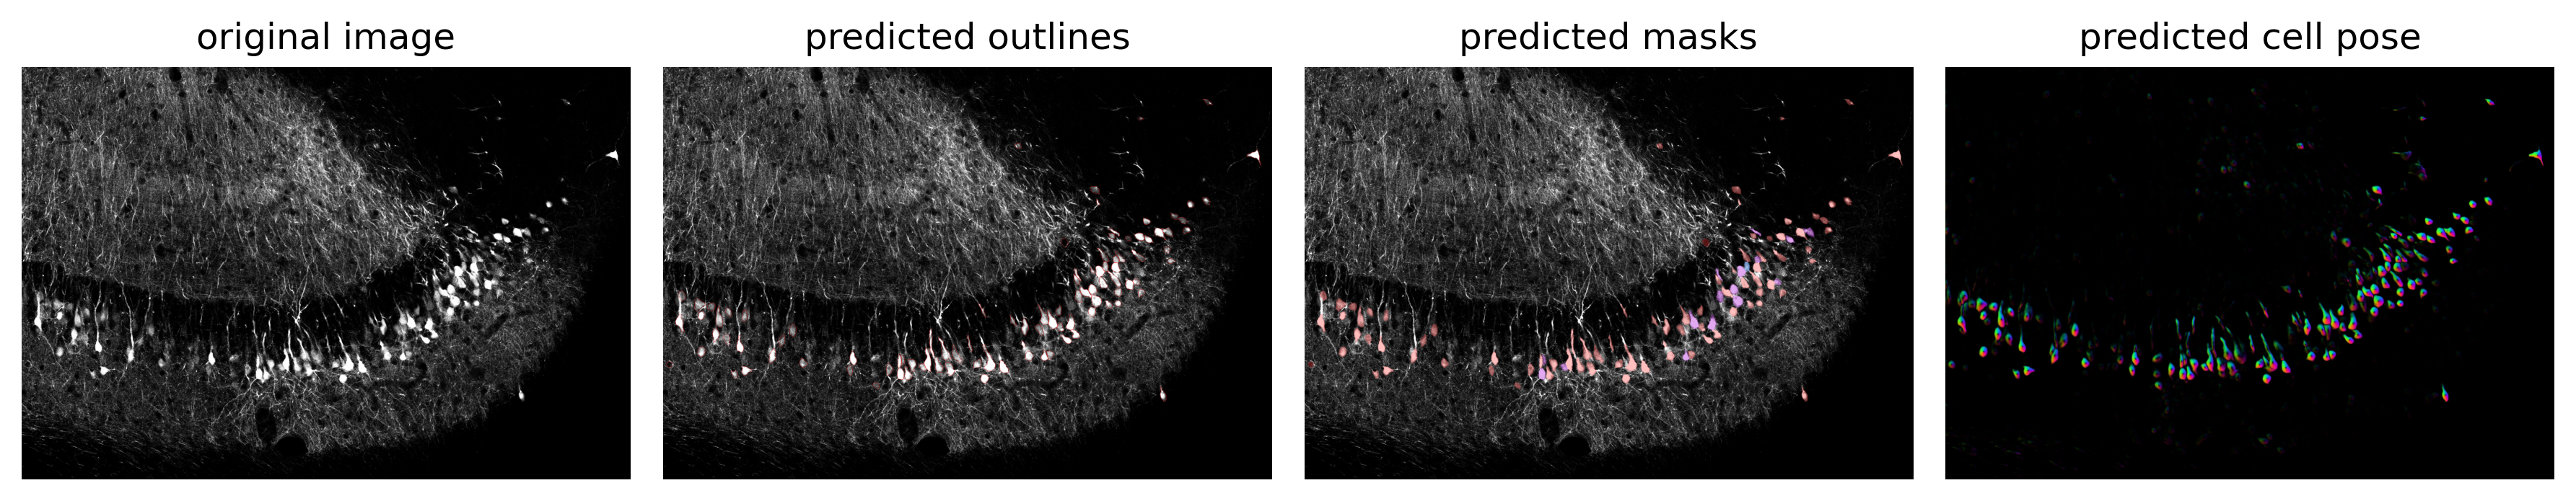

In [68]:
#Visualizing result

from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()